# Import
### all the necessary for ML project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
import xgboost as xgb

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Load
The dataset again and print the dataframe

In [82]:
url_diamond = "/Users/francescoaldoventurelli/Desktop/diamonds/diamonds.csv"  ## paste the url
data_diamond = pd.read_csv(url_diamond)  # read with pandas method for csv

df = pd.DataFrame(data_diamond) # create and print the dataframe

We transform all the features (categorical) into numerical features in order to have a better/sophisticated model

In [9]:
# Use all the features.
# We assign numerical values to all the categorical features in order to use both numerical and categorical
# in our predictive model.

print(set(df["clarity"]))
print(set(df["color"]))
print(set(df["cut"]))

{'VS2', 'SI2', 'IF', 'I1', 'VVS1', 'SI1', 'VVS2', 'VS1'}
{'D', 'J', 'I', 'E', 'H', 'F', 'G'}
{'Very Good', 'Fair', 'Premium', 'Ideal', 'Good'}


In [10]:
# The current function takes in a categorical column of the dataframe and convert the strings into numerical values

def custom_map(data):
    """
    Parameter of input: data. It must be of this kind: set(df[column]);
    Return: dict(mapp).
    """
    num_vals = []
    get_length = len(data)
    for i in range(get_length):
        num_vals.append(i+1)

    mapp = {}
    for num, dat in enumerate(data):
        mapp[dat] = num + 1
    return mapp


clarity_numerical = custom_map((set(df["clarity"])))
cut_numerical = custom_map(set(df["cut"]))
color_numerical = custom_map(set(df["color"]))

In [11]:
print(clarity_numerical)
print(cut_numerical)
print(color_numerical)

{'VS2': 1, 'SI2': 2, 'IF': 3, 'I1': 4, 'VVS1': 5, 'SI1': 6, 'VVS2': 7, 'VS1': 8}
{'Very Good': 1, 'Fair': 2, 'Premium': 3, 'Ideal': 4, 'Good': 5}
{'D': 1, 'J': 2, 'I': 3, 'E': 4, 'H': 5, 'F': 6, 'G': 7}


In [12]:
# Apply the transformation

df["color"] = df["color"].replace(color_numerical)
df["clarity"] = df["clarity"].replace(clarity_numerical)
df["cut"] = df["cut"].replace(cut_numerical)

In [13]:
df

carat  cut  color  clarity  depth  table  price     x     y     z
0      1.10    4      5        2   62.0   55.0   4733  6.61  6.65  4.11
1      1.29    4      5        6   62.6   56.0   6424  6.96  6.93  4.35
2      1.20    3      3        6   61.1   58.0   5510  6.88  6.80  4.18
3      1.50    4      6        6   60.9   56.0   8770  7.43  7.36  4.50
4      0.90    1      6        1   61.7   57.0   4493  6.17  6.21  3.82
...     ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
4995   0.38    4      5        7   62.3   53.3    832  4.65  4.69  2.91
4996   0.33    3      7        7   61.3   59.0    927  4.45  4.42  2.72
4997   1.25    4      2        7   62.1   56.0   5980  6.81  6.84  4.24
4998   0.31    3      6        1   62.9   58.0    802  4.31  4.27  2.70
4999   0.30    4      5        5   61.2   57.0    655  4.30  4.39  2.66

[5000 rows x 10 columns]

# Correlation matrix completed

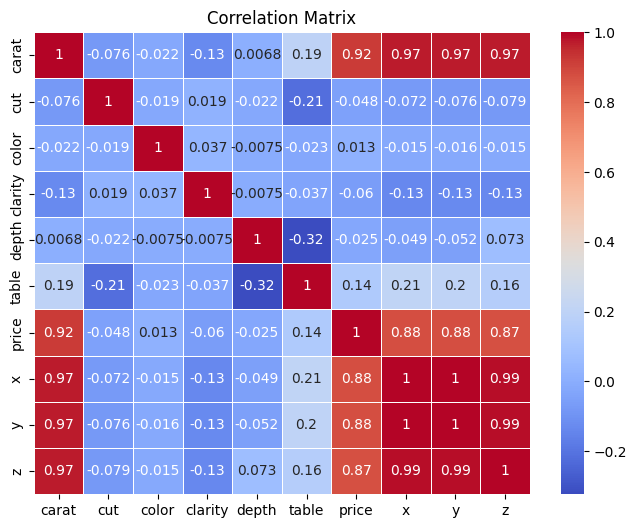

In [14]:
correlation_matrix = df[df.columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Set the ML problem
We copy the dataframe and we extract the set of features we would feed the model with and we extract the 
corresponding labels (i.e. prices) since the problem is Supervised

In [15]:
df_copy = df.copy()

X = df_copy.drop(columns=["price"], axis=1)
X

carat  cut  color  clarity  depth  table     x     y     z
0      1.10    4      5        2   62.0   55.0  6.61  6.65  4.11
1      1.29    4      5        6   62.6   56.0  6.96  6.93  4.35
2      1.20    3      3        6   61.1   58.0  6.88  6.80  4.18
3      1.50    4      6        6   60.9   56.0  7.43  7.36  4.50
4      0.90    1      6        1   61.7   57.0  6.17  6.21  3.82
...     ...  ...    ...      ...    ...    ...   ...   ...   ...
4995   0.38    4      5        7   62.3   53.3  4.65  4.69  2.91
4996   0.33    3      7        7   61.3   59.0  4.45  4.42  2.72
4997   1.25    4      2        7   62.1   56.0  6.81  6.84  4.24
4998   0.31    3      6        1   62.9   58.0  4.31  4.27  2.70
4999   0.30    4      5        5   61.2   57.0  4.30  4.39  2.66

[5000 rows x 9 columns]

In [16]:
Y = df["price"]  # labels

# Create
train and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=99)

In [23]:
import warnings
warnings.filterwarnings("ignore")

# Start with some models

# Random forest

In [24]:
r_forest_regressor = RandomForestRegressor(n_estimators=10000, max_depth=5, random_state=88)

In [25]:
# fit the data
r_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10000, random_state=88)

In [26]:
# Predict the test set

prediction_forest = r_forest_regressor.predict(X_test)
prediction_forest

array([2750.52550271, 1925.64108351, 2788.93500283, ..., 5717.93797575,
        740.30198025, 8726.76310206])

# Features importance 4 Random Forest

In [27]:
# We visualize the results into a dataframe

df_features_forest = pd.DataFrame(data=r_forest_regressor.feature_importances_, index=r_forest_regressor.feature_names_in_,
            columns=["price"])

In [28]:
df_features_forest.sort_values("price")

price
cut      0.000163
table    0.000325
depth    0.002726
z        0.012123
color    0.012655
clarity  0.023177
x        0.041002
carat    0.389048
y        0.518781

### Feature's importance

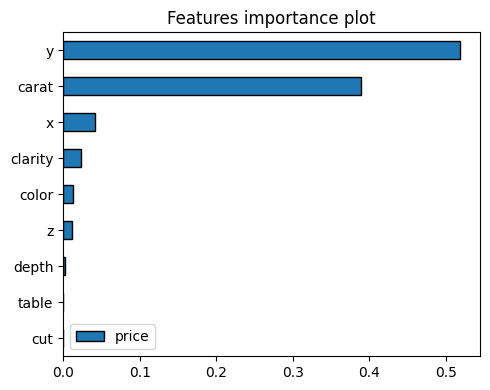

In [29]:
df_features_forest.sort_values("price").plot(kind="barh", title="Features importance plot", figsize=(5,4), edgecolor="k")
plt.tight_layout()

# Decision tree

In [30]:
dtree = DecisionTreeRegressor(criterion="squared_error", random_state=55, max_depth=5)

In [31]:
# fit the data

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=55)

In [32]:
# predict the test set

pred_tree = dtree.predict(X_test)
pred_tree

array([2733.62046205, 1816.63779528, 2733.62046205, ..., 6159.59119497,
        746.32608696, 8897.51428571])

In [33]:
df_features_tree = pd.DataFrame(data=dtree.feature_importances_, index=dtree.feature_names_in_,
            columns=["price"])

In [35]:
df_features_tree.sort_values("price")

price
cut      0.000000
table    0.000000
x        0.001218
depth    0.003082
z        0.003531
color    0.014417
clarity  0.021609
y        0.211671
carat    0.744471

# Metrics

In [36]:
print("Random forest score:", r_forest_regressor.score(X_test, y_test))
print("Decision tree score", dtree.score(X_test, y_test))

Random forest score: 0.9059135670390955
Decision tree score 0.8895647392229094


In [37]:
print("Random forest r_mse:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=prediction_forest)))
print("Decision tree r_mse:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred_tree)))

Random forest r_mse: 1214.001222039256
Decision tree r_mse: 1315.2536102559368


# X-GBoost

In [38]:
xgb_regressor = xgb.XGBRegressor(n_estimators=10000,early_stopping_rounds=50, learning_rate=0.001)
xgb_regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=100)

[0]	validation_0-rmse:3978.72830	validation_1-rmse:3954.64898
[100]	validation_0-rmse:3638.65590	validation_1-rmse:3621.41430
[200]	validation_0-rmse:3332.70460	validation_1-rmse:3322.53283
[300]	validation_0-rmse:3057.25990	validation_1-rmse:3054.43352
[400]	validation_0-rmse:2809.40280	validation_1-rmse:2814.53797
[500]	validation_0-rmse:2586.58978	validation_1-rmse:2598.84408
[600]	validation_0-rmse:2386.48791	validation_1-rmse:2405.76729
[700]	validation_0-rmse:2206.74981	validation_1-rmse:2233.40108
[800]	validation_0-rmse:2043.85798	validation_1-rmse:2081.23767
[900]	validation_0-rmse:1896.45397	validation_1-rmse:1945.72567
[1000]	validation_0-rmse:1764.86913	validation_1-rmse:1825.18061
[1100]	validation_0-rmse:1647.00031	validation_1-rmse:1717.27641
[1200]	validation_0-rmse:1540.95425	validation_1-rmse:1622.25881
[1300]	validation_0-rmse:1444.79674	validation_1-rmse:1537.54408
[1400]	validation_0-rmse:1359.99379	validation_1-rmse:1463.12427
[1500]	validation_0-rmse:1284.55837	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
xgb_pred = xgb_regressor.predict(X_test)
xgb_pred

array([2896.2952 , 2193.1602 , 2802.4722 , ..., 4996.057  ,  719.50165,
       7528.7773 ], dtype=float32)

In [40]:
print("XGBOOST r_mse:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=xgb_pred)))
print("")
print("XGBOOST Score:", xgb_regressor.score(X_test, y_test))

XGBOOST r_mse: 889.9311058595915

XGBOOST Score: 0.9494406444225589


# Features importance 4 all
### Check which are the most important features the model has learnt

In [41]:
df_features_xgb = pd.DataFrame(data=xgb_regressor.feature_importances_, index=xgb_regressor.feature_names_in_,
            columns=["price"])
df_features_xgb

price
carat    0.327797
cut      0.003694
color    0.014314
clarity  0.024252
depth    0.006173
table    0.003939
x        0.011811
y        0.595050
z        0.012970

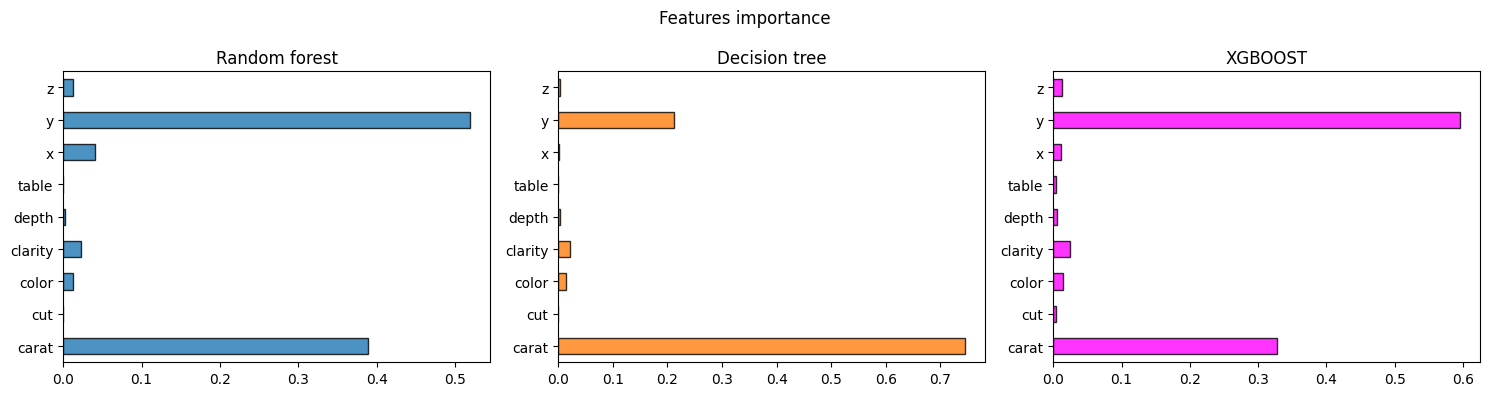

In [42]:
on = "price"
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plt.suptitle("Features importance")
ax[0].set_title("Random forest")
ax[1].set_title("Decision tree")
ax[2].set_title("XGBOOST")
df_features_forest.plot(kind="barh", edgecolor="k", ax=ax[0], alpha=0.8, legend=False)
df_features_tree.plot(kind="barh", edgecolor="k", color="tab:orange", ax=ax[1], alpha=0.8, legend=False)
df_features_xgb.plot(kind="barh", edgecolor="k", color="magenta", ax=ax[2], alpha=0.8, legend=False)
plt.tight_layout()
plt.show()


# N. B.
Xgboost and Random forest "assign" almost the same importance to the features, instead Decision Tree does not.
Let's try a grid search for the Decision Tree in order to see if there is a change

### Grid search 4 Decision Tree

In [43]:
parameters={"splitter":["best","random"],
            "max_depth" : [2,3,5,6,7,9,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80] }

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# Set up the grid search to find the best hyper-parameter tuning
dtree_tuning=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
dtree_tuning.fit(X_train, y_train)

In [47]:
# Estimated time more/less: 5 min 55 sec

In [48]:
dtree_tuning.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [49]:
dtree_tuning.best_score_

-2689762.8819947247

In [50]:
tuned_dtree = DecisionTreeRegressor(max_depth=5, max_features="log2", max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter="best")

In [51]:
tuned_dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)

In [52]:
# prediction
tuned_prediction=tuned_dtree.predict(X_test)
tuned_prediction

array([3123.26345609, 1551.09641873, 2111.71774194, ..., 9834.18306011,
        761.9939577 , 8583.64137931])

In [53]:
df_features_dtree_TUNED = pd.DataFrame(data=tuned_dtree.feature_importances_, index=tuned_dtree.feature_names_in_,
            columns=["price"])
df_features_dtree_TUNED.sort_values("price")

price
cut      0.000000
color    0.000000
depth    0.000000
table    0.000000
z        0.000000
clarity  0.009455
x        0.011953
carat    0.028696
y        0.949895

# Final plot with Dtree tuned

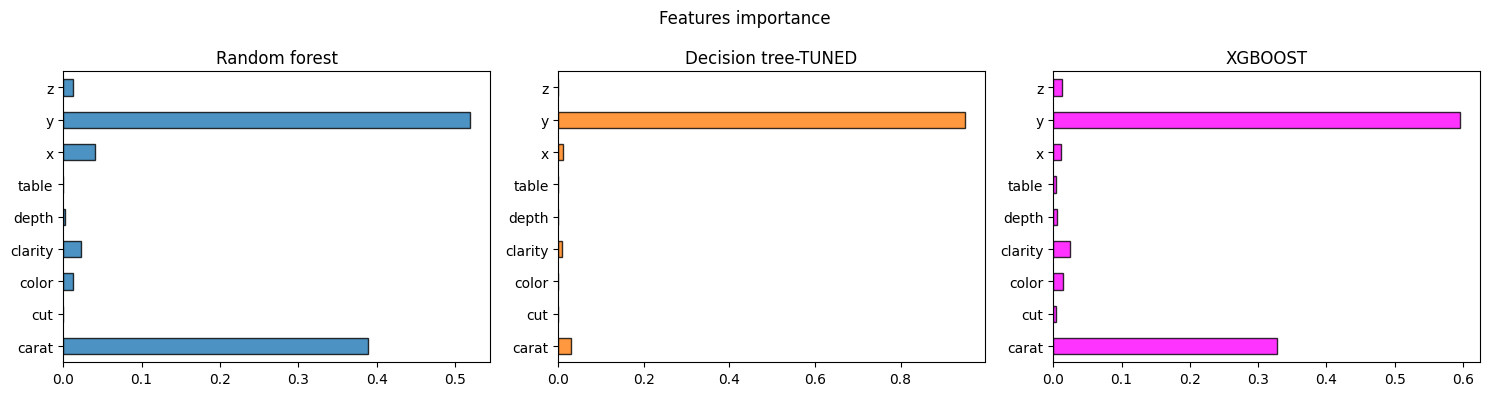

In [54]:
on = "price"
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plt.suptitle("Features importance")
ax[0].set_title("Random forest")
ax[1].set_title("Decision tree-TUNED")
ax[2].set_title("XGBOOST")
df_features_forest.plot(kind="barh", edgecolor="k", ax=ax[0], alpha=0.8, legend=False)
df_features_dtree_TUNED.plot(kind="barh", edgecolor="k", color="tab:orange", ax=ax[1], alpha=0.8, legend=False)
df_features_xgb.plot(kind="barh", edgecolor="k", color="magenta", ax=ax[2], alpha=0.8, legend=False)
plt.tight_layout()
plt.show()

#### Same feature's importance!!!

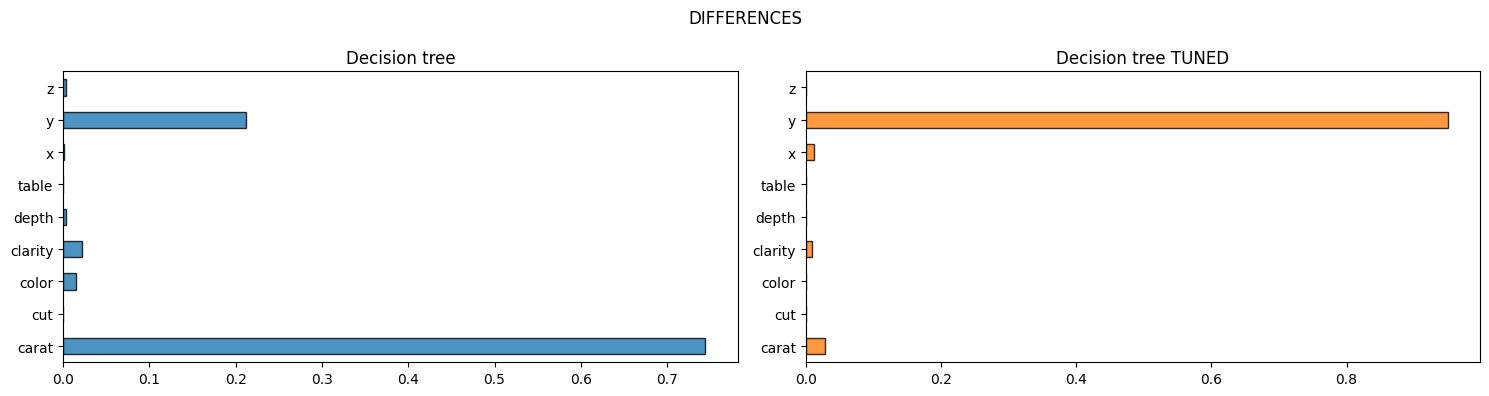

In [55]:
on = "price"
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plt.suptitle("DIFFERENCES")
ax[0].set_title("Decision tree")
ax[1].set_title("Decision tree TUNED")

df_features_tree.plot(kind="barh", edgecolor="k", ax=ax[0], alpha=0.8, legend=False)
df_features_dtree_TUNED.plot(kind="barh", edgecolor="k", color="tab:orange", ax=ax[1], alpha=0.8, legend=False)

plt.tight_layout()
plt.show()

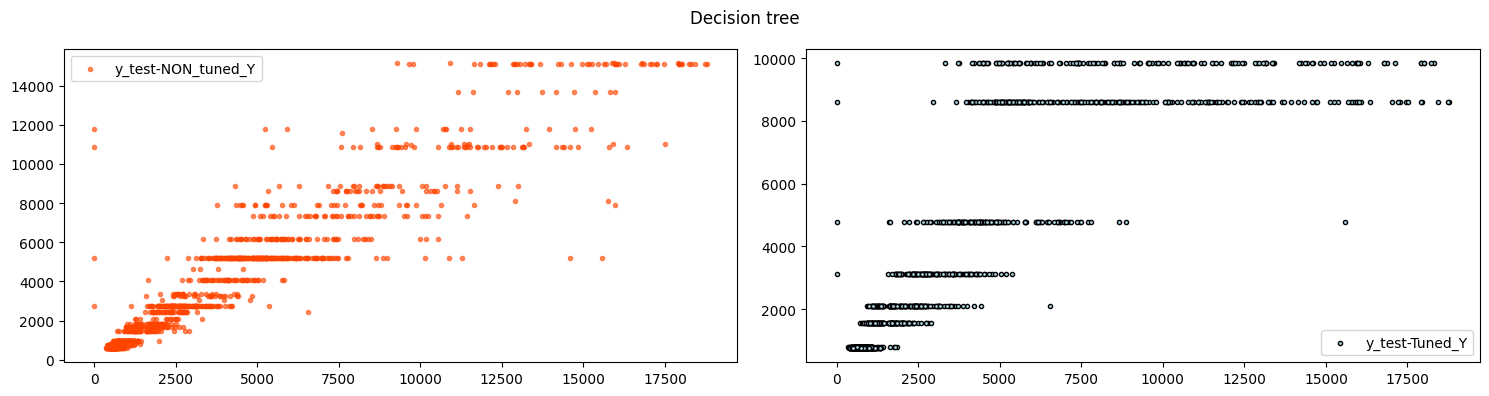

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plt.suptitle("Decision tree")
ax[0].scatter(y_test,pred_tree, label="y_test-NON_tuned_Y", color="orangered", marker='.', alpha=0.6)
ax[1].scatter(y_test, tuned_prediction, label="y_test-Tuned_Y", color='lightblue', marker='.', edgecolor='k')
ax[0].legend()
ax[1].legend()
plt.tight_layout()

In [57]:
print('Root MSE for NON-tuned and tuned Dtree:', np.sqrt(mean_squared_error(y_test, tuned_prediction)))

Root MSE for NON-tuned and tuned Dtree: 2168.9747388298993


In [59]:
target_set = X_test

# New data

In [60]:
target_set

carat  cut  color  clarity  depth  table     x     y     z
1034   0.74    1      7        8   59.8   58.0  5.85  5.89  3.51
250    0.55    1      4        7   60.6   56.0  5.33  5.36  3.24
2578   0.70    4      6        1   61.0   55.0  5.74  5.79  3.52
3525   1.16    3      7        8   61.9   58.0  6.76  6.72  4.17
3533   0.90    5      7        3   63.1   58.0  6.09  6.18  3.87
...     ...  ...    ...      ...    ...    ...   ...   ...   ...
836    1.22    4      3        6   61.7   55.2  6.84  6.90  4.24
2067   0.28    1      4        8   58.9   58.0  4.27  4.32  2.53
1139   1.15    1      5        2   63.0   54.0  6.64  6.73  4.21
2515   0.33    1      4        6   63.4   55.0  4.40  4.37  2.78
2442   1.01    3      7        7   61.9   59.0  6.45  6.41  3.98

[1500 rows x 9 columns]

In [ ]:
target_set["prediction_xgboost"] = xgb_regressor.predict(X_test)
target_set["prediction_dtree"] = pred_tree
target_set["prediction_rforest"] = prediction_forest
target_set["prediction_dtree_TUNED"] = tuned_prediction

In [62]:
target_set["actual price"] = y_test
target_set

carat  cut  color  clarity  depth  table     x     y     z   
1034   0.74    1      7        8   59.8   58.0  5.85  5.89  3.51  \
250    0.55    1      4        7   60.6   56.0  5.33  5.36  3.24   
2578   0.70    4      6        1   61.0   55.0  5.74  5.79  3.52   
3525   1.16    3      7        8   61.9   58.0  6.76  6.72  4.17   
3533   0.90    5      7        3   63.1   58.0  6.09  6.18  3.87   
...     ...  ...    ...      ...    ...    ...   ...   ...   ...   
836    1.22    4      3        6   61.7   55.2  6.84  6.90  4.24   
2067   0.28    1      4        8   58.9   58.0  4.27  4.32  2.53   
1139   1.15    1      5        2   63.0   54.0  6.64  6.73  4.21   
2515   0.33    1      4        6   63.4   55.0  4.40  4.37  2.78   
2442   1.01    3      7        7   61.9   59.0  6.45  6.41  3.98   

      prediction_xgboost  prediction_dtree  prediction_rforest   
1034         2896.295166       2733.620462         2750.525503  \
250          2193.160156       1816.637795         1925.641084   
2578         2802.472168       2733.620462         2788.935003   
3525         7707.108398       7366.026549         7499.175765   
3533         4048.801758       4063.656250         3867.669089   
...                  ...               ...                 ...   
836          5711.000488       6159.591195         6194.222724   
2067          638.784119        597.172794          607.826070   
1139         4996.057129       6159.591195         5717.937976   
2515          719.501648        746.326087          740.301980   
2442         7528.777344       8897.514286         8726.763102   

      prediction_dtree_TUNED  actual price  
1034             3123.263456          2896  
250              1551.096419          2499  
2578             2111.717742          3468  
3525             8583.641379          8107  
3533             4780.428571          5771  
...                      ...           ...  
836              8583.641379          6062  
2067              761.993958           487  
1139             9834.183060          4483  
2515              761.993958           743  
2442             8583.641379          7964  

[1500 rows x 14 columns]

### This is our test set where the indeces correspond to the indeces extracted from the original df

# PLots
## XGBOOST

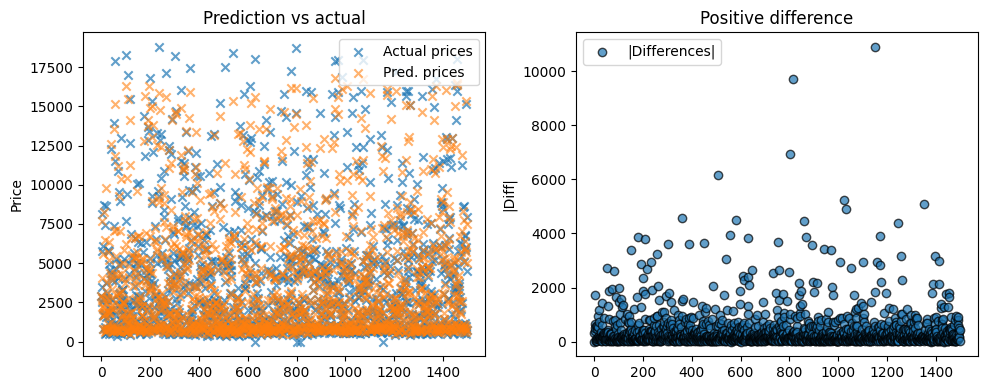

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.set_title("Prediction vs actual")
ax1.scatter(x=range(len(y_test)), y=target_set["actual price"], color="tab:blue", marker="x",
            label="Actual prices", alpha=0.7)
ax1.scatter(x=range(len(y_test)), y=target_set["prediction_xgboost"], color="tab:orange", marker="x",
            label="Pred. prices", alpha=0.6)
ax1.legend(loc="best")
ax1.set_ylabel("Price")
ax2.set_title("Positive difference")
ax2.scatter(x=range(len(y_test)), y=np.abs(np.subtract(target_set["actual price"], target_set["prediction_xgboost"])), color="tab:blue", marker="o",
            label="|Differences|", alpha=0.7, edgecolors="k")
ax2.legend(loc="best")
ax2.set_ylabel("|Diff|")
plt.tight_layout()
plt.show()

## Decision tree

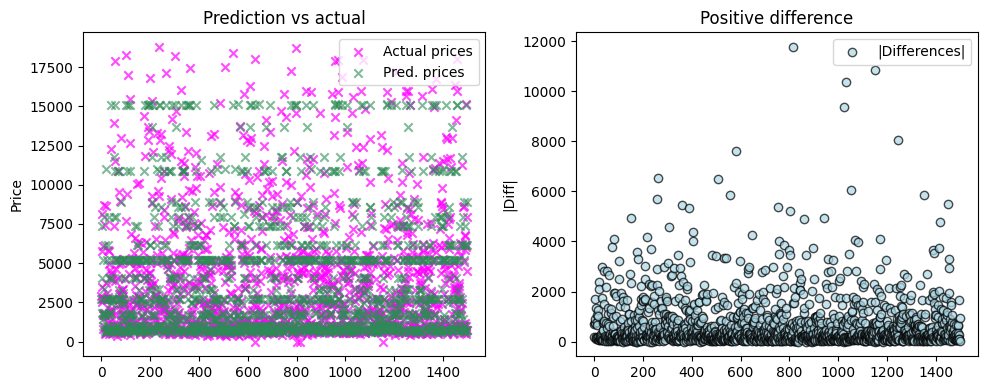

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.set_title("Prediction vs actual")
ax1.scatter(x=range(len(y_test)), y=target_set["actual price"], color="magenta", marker="x",
            label="Actual prices", alpha=0.7)
ax1.scatter(x=range(len(y_test)), y=target_set["prediction_dtree"], color="seagreen", marker="x",
            label="Pred. prices", alpha=0.6)
ax1.legend(loc="best")
ax1.set_ylabel("Price")
ax2.set_title("Positive difference")
ax2.scatter(x=range(len(y_test)), y=np.abs(np.subtract(target_set["actual price"], target_set["prediction_dtree"])), color="lightblue", marker="o",
            label="|Differences|", alpha=0.7, edgecolors="k")
ax2.legend(loc="best")
ax2.set_ylabel("|Diff|")
plt.tight_layout()
plt.show()

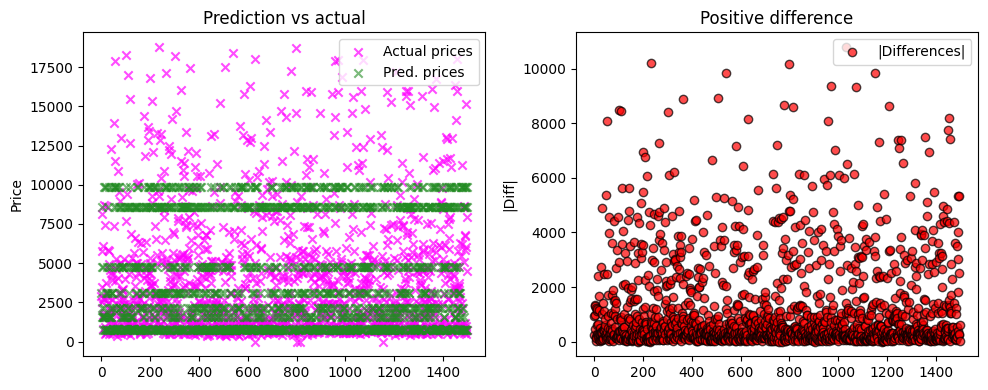

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.set_title("Prediction vs actual")
ax1.scatter(x=range(len(y_test)), y=target_set["actual price"], color="magenta", marker="x",
            label="Actual prices", alpha=0.7)
ax1.scatter(x=range(len(y_test)), y=target_set["prediction_dtree_TUNED"], color="forestgreen", marker="x",
            label="Pred. prices", alpha=0.6)
ax1.legend(loc="best")
ax1.set_ylabel("Price")
ax2.set_title("Positive difference")
ax2.scatter(x=range(len(y_test)), y=np.abs(np.subtract(target_set["actual price"], target_set["prediction_dtree_TUNED"])), color="red", marker="o",
            label="|Differences|", alpha=0.7, edgecolors="k")
ax2.legend(loc="best")
ax2.set_ylabel("|Diff|")
plt.tight_layout()
plt.show()

# Random forest

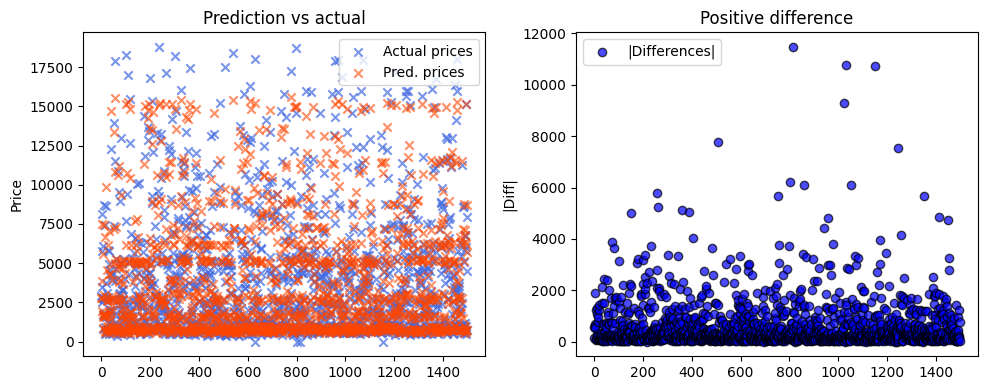

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.set_title("Prediction vs actual")
ax1.scatter(x=range(len(y_test)), y=target_set["actual price"], color="royalblue", marker="x",
            label="Actual prices", alpha=0.7)
ax1.scatter(x=range(len(y_test)), y=target_set["prediction_rforest"], color="orangered", marker="x",
            label="Pred. prices", alpha=0.6)
ax1.legend(loc="best")
ax1.set_ylabel("Price")
ax2.set_title("Positive difference")
ax2.scatter(x=range(len(y_test)), y=np.abs(np.subtract(target_set["actual price"], target_set["prediction_rforest"])), color="blue", marker="o",
            label="|Differences|", alpha=0.7, edgecolors="k")
ax2.legend(loc="best")
ax2.set_ylabel("|Diff|")
plt.tight_layout()
plt.show()

In [70]:
mse_xgb = np.sqrt(mean_squared_error(target_set["actual price"], target_set["prediction_xgboost"]))
mse_tree = np.sqrt(mean_squared_error(target_set["actual price"], target_set["prediction_dtree"]))
mse_tree_TUNED = np.sqrt(mean_squared_error(target_set["actual price"], target_set["prediction_dtree_TUNED"]))
mse_rforest = np.sqrt(mean_squared_error(target_set["actual price"], target_set["prediction_rforest"]))
mse_xgb, mse_tree, mse_tree_TUNED, mse_rforest

(889.9311058595915, 1315.2536102559368, 2168.9747388298993, 1214.001222039256)

In [ ]:
# Error

pos_err_xgb = np.abs(np.subtract(X_test["actual price"], X_test["prediction_xgboost"]))
pos_err_dtree = np.abs(np.subtract(X_test["actual price"], X_test["prediction_dtree"]))
pos_err_dtree_TUNED = np.abs(np.subtract(X_test["actual price"], X_test["prediction_dtree_TUNED"]))
pos_err_rforest = np.abs(np.subtract(X_test["actual price"], X_test["prediction_rforest"]))

pos_err_xgb, pos_err_dtree, pos_err_dtree_TUNED, pos_err_rforest

In [72]:
target_set["perr. xgb"] = pos_err_xgb
target_set["perr. dtree"] = pos_err_dtree
target_set["perr. dtree TUNED"] = pos_err_dtree_TUNED
target_set["perr. rforest"] = pos_err_rforest

In [75]:
xtest = X_test[["carat", "cut",	"color", "clarity",	"depth", "table", "x","y","z"]]

In [76]:
scores = [xgb_regressor.score(xtest, y_test), dtree.score(xtest, y_test), tuned_dtree.score(xtest, y_test),
          r_forest_regressor.score(xtest, y_test)]

scores

[0.9494406444225589,
 0.8895647392229094,
 0.6996706723205948,
 0.9059135670390955]

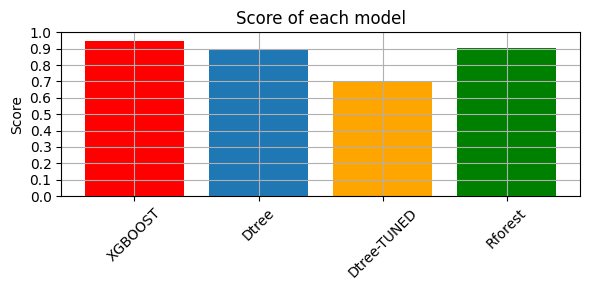

In [77]:
xaxis = np.array(["XGBOOST", "Dtree", "Dtree-TUNED", "Rforest"])
colors = ["red", "tab:blue", "orange", "green"]
yvalue = np.arange(0,1.1,0.1)

plt.figure(figsize=(6,3))
plt.bar(x=xaxis, height=scores, color=[col for col in colors])
plt.grid(True)
plt.ylabel("Score")
plt.title("Score of each model")
plt.xticks(rotation=45)
plt.yticks(yvalue)
plt.tight_layout()


### Xgboost has reached the maximum score and we can consider as the best classifier for this task with respect to the others. 
### Surprisingly the TUNED decision tree performs worst with respect to the original one, but it has identified the same features as the Random forest and Xgboost,.....interesting!

# Last 

In [78]:
target_set

carat  cut  color  clarity  depth  table     x     y     z   
1034   0.74    1      7        8   59.8   58.0  5.85  5.89  3.51  \
250    0.55    1      4        7   60.6   56.0  5.33  5.36  3.24   
2578   0.70    4      6        1   61.0   55.0  5.74  5.79  3.52   
3525   1.16    3      7        8   61.9   58.0  6.76  6.72  4.17   
3533   0.90    5      7        3   63.1   58.0  6.09  6.18  3.87   
...     ...  ...    ...      ...    ...    ...   ...   ...   ...   
836    1.22    4      3        6   61.7   55.2  6.84  6.90  4.24   
2067   0.28    1      4        8   58.9   58.0  4.27  4.32  2.53   
1139   1.15    1      5        2   63.0   54.0  6.64  6.73  4.21   
2515   0.33    1      4        6   63.4   55.0  4.40  4.37  2.78   
2442   1.01    3      7        7   61.9   59.0  6.45  6.41  3.98   

      prediction_xgboost  prediction_dtree  prediction_rforest   
1034         2896.295166       2733.620462         2750.525503  \
250          2193.160156       1816.637795         1925.641084   
2578         2802.472168       2733.620462         2788.935003   
3525         7707.108398       7366.026549         7499.175765   
3533         4048.801758       4063.656250         3867.669089   
...                  ...               ...                 ...   
836          5711.000488       6159.591195         6194.222724   
2067          638.784119        597.172794          607.826070   
1139         4996.057129       6159.591195         5717.937976   
2515          719.501648        746.326087          740.301980   
2442         7528.777344       8897.514286         8726.763102   

      prediction_dtree_TUNED  actual price    perr. xgb  perr. dtree   
1034             3123.263456          2896     0.295166   162.379538  \
250              1551.096419          2499   305.839844   682.362205   
2578             2111.717742          3468   665.527832   734.379538   
3525             8583.641379          8107   399.891602   740.973451   
3533             4780.428571          5771  1722.198242  1707.343750   
...                      ...           ...          ...          ...   
836              8583.641379          6062   350.999512    97.591195   
2067              761.993958           487   151.784119   110.172794   
1139             9834.183060          4483   513.057129  1676.591195   
2515              761.993958           743    23.498352     3.326087   
2442             8583.641379          7964   435.222656   933.514286   

      perr. dtree TUNED  perr. rforest  
1034         227.263456     145.474497  
250          947.903581     573.358916  
2578        1356.282258     679.064997  
3525         476.641379     607.824235  
3533         990.571429    1903.330911  
...                 ...            ...  
836         2521.641379     132.222724  
2067         274.993958     120.826070  
1139        5351.183060    1234.937976  
2515          18.993958       2.698020  
2442         619.641379     762.763102  

[1500 rows x 18 columns]

In [79]:
## I select the best model and I look at the characteristics

xgb_df = target_set.drop(columns=["prediction_dtree", "prediction_rforest", "prediction_dtree_TUNED",
                                  "perr. dtree", "perr. dtree TUNED", "perr. rforest"], axis=1)
xgb_df

carat  cut  color  clarity  depth  table     x     y     z   
1034   0.74    1      7        8   59.8   58.0  5.85  5.89  3.51  \
250    0.55    1      4        7   60.6   56.0  5.33  5.36  3.24   
2578   0.70    4      6        1   61.0   55.0  5.74  5.79  3.52   
3525   1.16    3      7        8   61.9   58.0  6.76  6.72  4.17   
3533   0.90    5      7        3   63.1   58.0  6.09  6.18  3.87   
...     ...  ...    ...      ...    ...    ...   ...   ...   ...   
836    1.22    4      3        6   61.7   55.2  6.84  6.90  4.24   
2067   0.28    1      4        8   58.9   58.0  4.27  4.32  2.53   
1139   1.15    1      5        2   63.0   54.0  6.64  6.73  4.21   
2515   0.33    1      4        6   63.4   55.0  4.40  4.37  2.78   
2442   1.01    3      7        7   61.9   59.0  6.45  6.41  3.98   

      prediction_xgboost  actual price    perr. xgb  
1034         2896.295166          2896     0.295166  
250          2193.160156          2499   305.839844  
2578         2802.472168          3468   665.527832  
3525         7707.108398          8107   399.891602  
3533         4048.801758          5771  1722.198242  
...                  ...           ...          ...  
836          5711.000488          6062   350.999512  
2067          638.784119           487   151.784119  
1139         4996.057129          4483   513.057129  
2515          719.501648           743    23.498352  
2442         7528.777344          7964   435.222656  

[1500 rows x 12 columns]

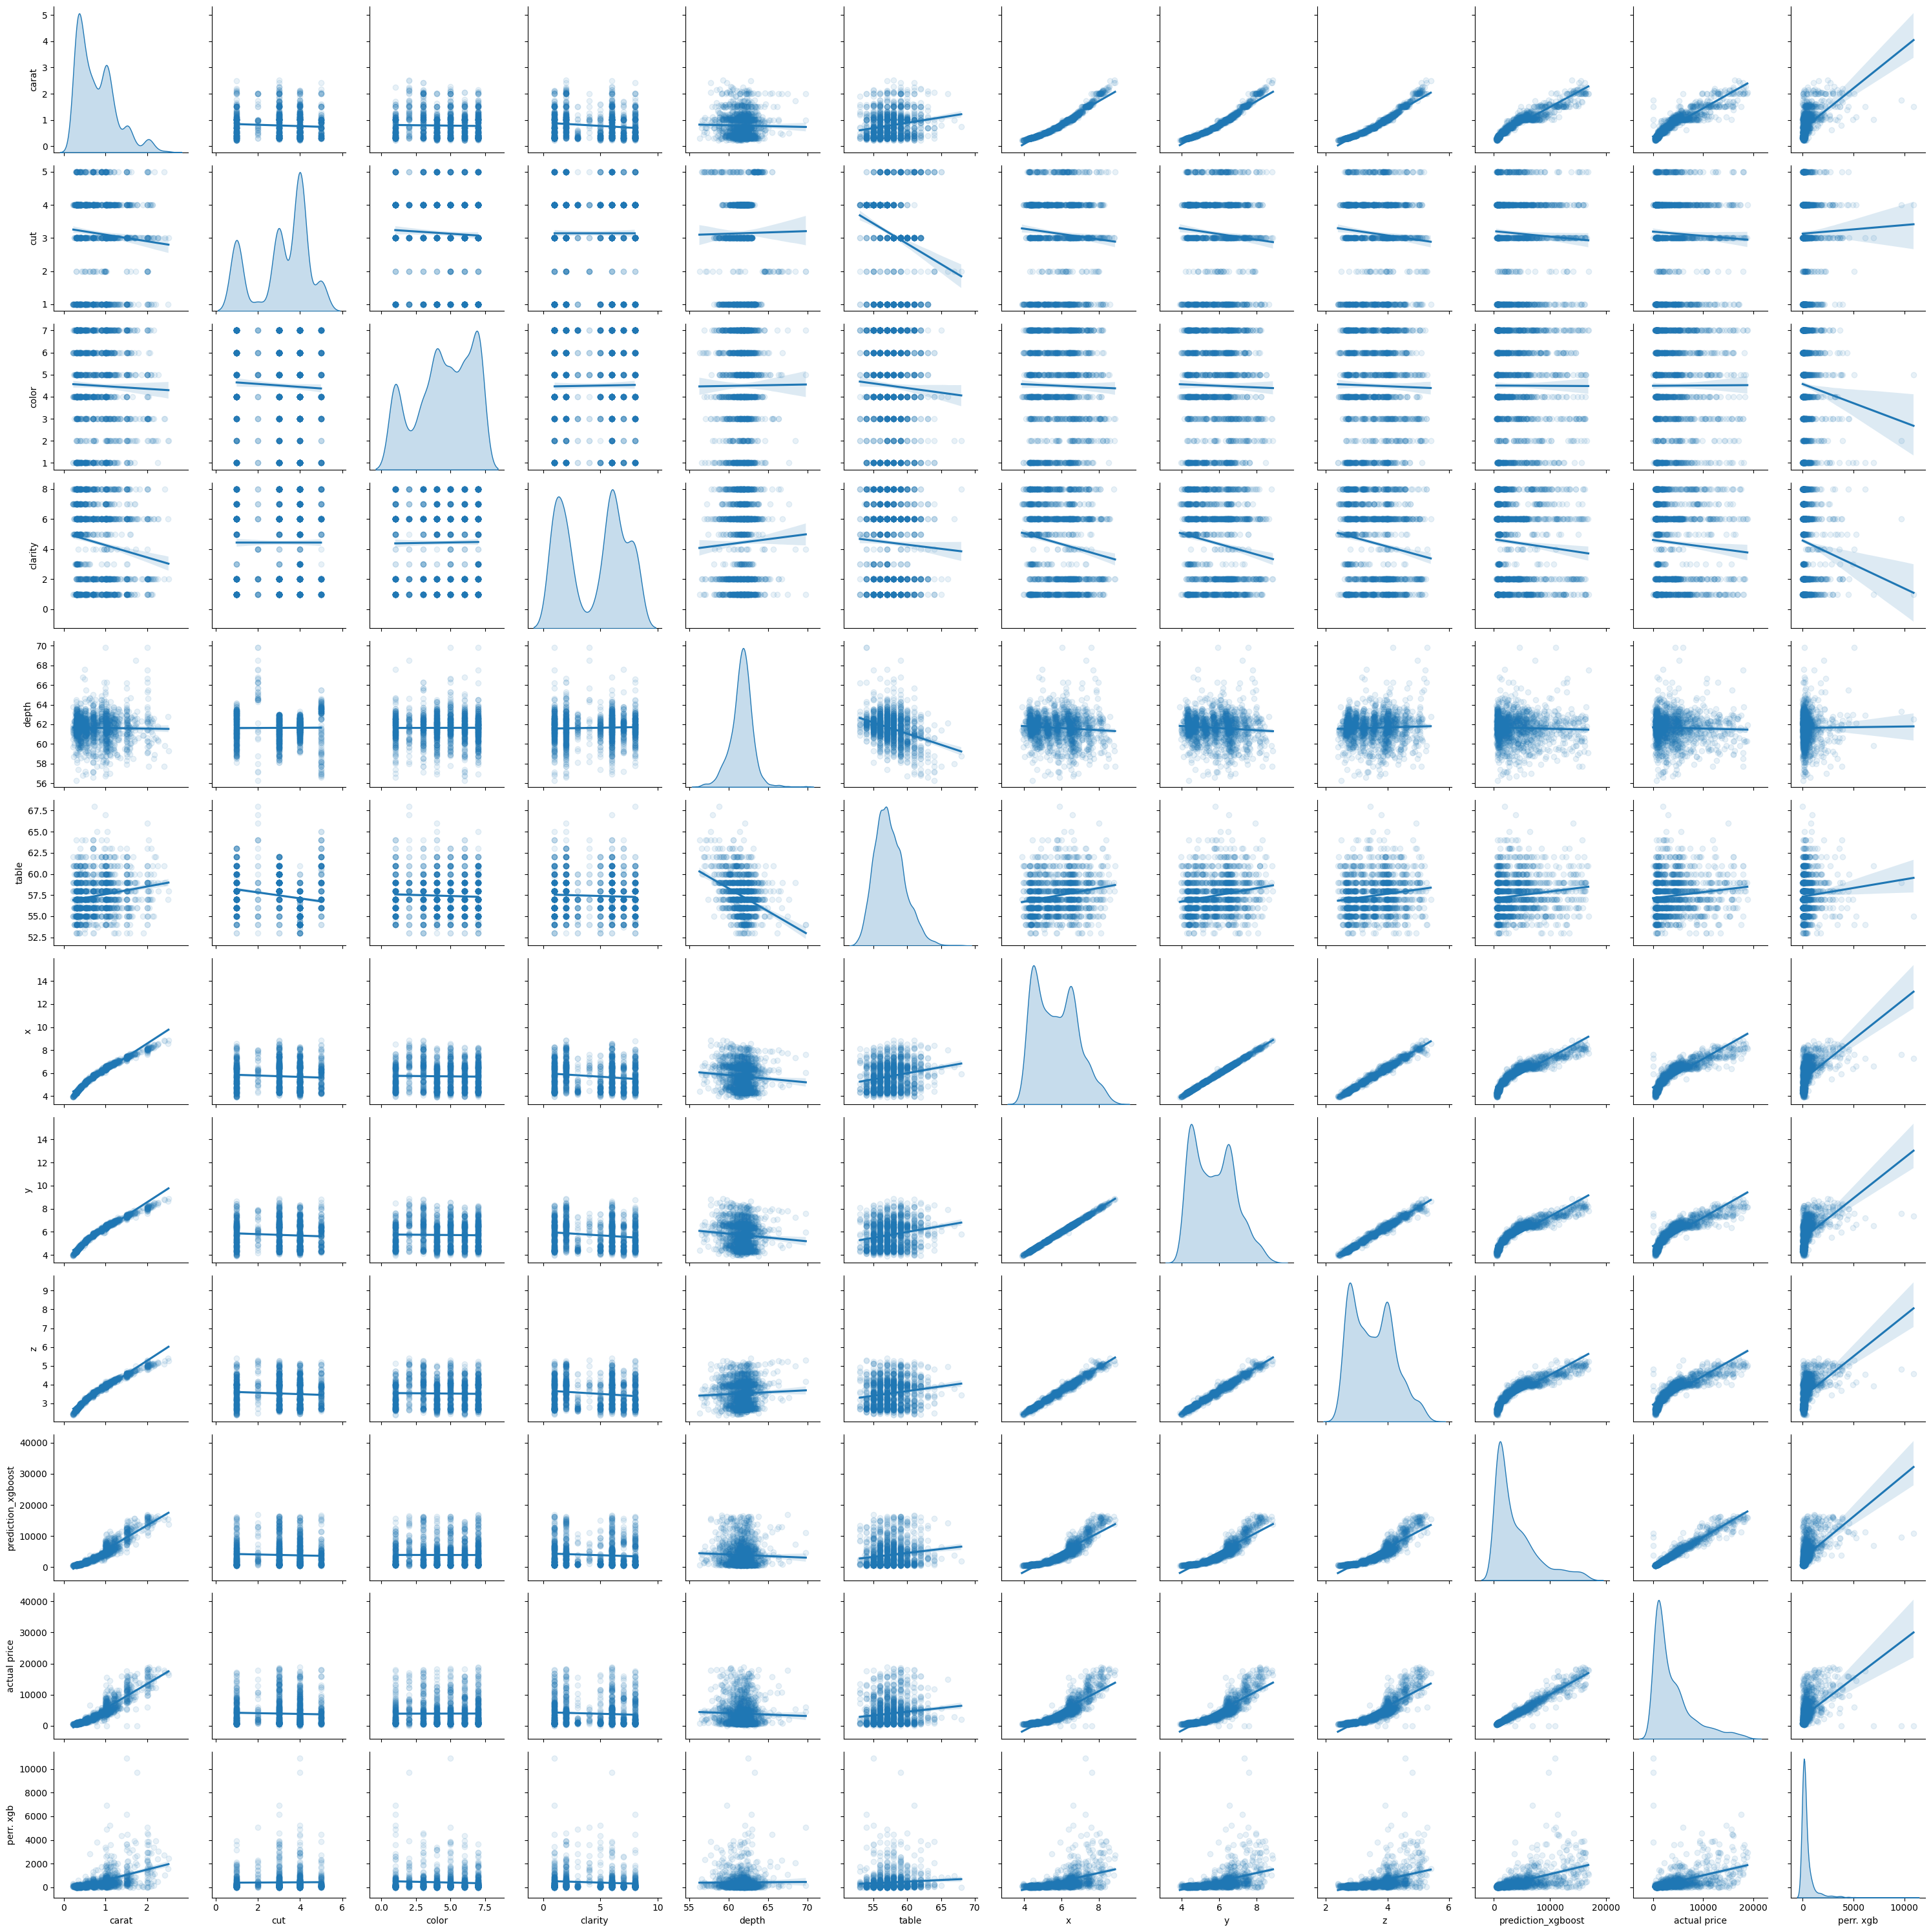

In [81]:
sns.pairplot(data=xgb_df, kind="reg", diag_kind="kde", 
            plot_kws={"scatter_kws": {"alpha": 0.1}})

plt.tight_layout()